In [3]:
# Markov chains are stochastic processes that undergo transitions from one state to another in a state space.
# They describe a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. 
# Transitions occur at every time step. Markov. These models are widely used in scientific and engineering applications.

#A Markov chain is a mathematical system that experiences transitions from one state to another according to certain probabilistic rules. 
# The defining characteristic of a Markov chain is that no matter how the process arrived at its present state, the possible future states are fixed.

Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [5]:
# First we'll set some arbitrary inputs
# for a maximum population size, as well 
# as the birth and death rates

N = 100  # maximum population size
a = .5 / N  # birth rate
b = .5 / N  # death rate

In [7]:
# Next, we'll construct an array to hold 1000 simulation steps using 
# numpy. Since our Markov chain is simulated in finite space e.g. 0,1,...,N. 
# Each state in the 1000-step array will represent a population size.
# The x vector will contain the population size at each time step. 
# We set the initial population size to x0 = 15 meaning there are 15
# people in our population when we start the simulation.

nsteps = 1000

x = np.zeros(nsteps)

x[0] = 15

In [9]:
# Now we can simulate our Markov chain. For each time step, there is a new birth 
# with probability axt, and independently, there is a new death with 
# probability bxt. These probabilities are proportional to the size 
# of the population at that time (as initialized above). 
# If the population size reaches 0 or N, the evolution stops:
for t in range(nsteps - 1):
    # As long as we haven't reached our max population # or
    # a population size of 0...
    if 0 < x[t] < N - 1:
        # Check to see if there's a birth
        birth = np.random.rand() <= a * x[t]
        # Check to see if there's a death
        death = np.random.rand() <= b * x[t]
        # Update the population size accordingly
        x[t + 1] = x[t] + 1 * birth - 1 * death
    # The evolution stops if we reach 0 or N
    else:
        x[t + 1] = x[t]

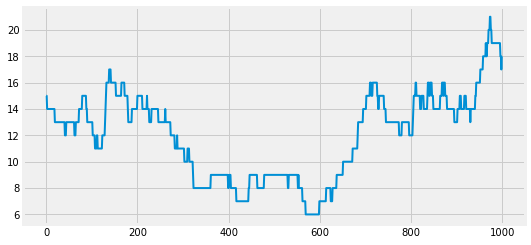

In [10]:
# Let's visualize the the evolution of the population size 
# based on our function above:        
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, lw=2)

# (as we can see, at every time step the population size can stay stable, increase, or decrease by 1)

In [11]:
# Now that we set up a single function to simulate population size, we can 
# simulate several independent trials of the Markov chain. Note that we could also 
# just loop over the previous code, but it would be inefficient given the nested for
# loops.
#
# So, we will vectorize the simulation by considering all independent trials at once. There is a single loop over time. 
# At every time step, we update all trials simultaneously with vectorized operations 
# on vectors. The x vector now contains the population size of all trials, at a 
# particular time. At initialization time, the population sizes are set to random 
# numbers between 0 and N:
ntrials = 100
x = np.random.randint(size=ntrials,
                      low=0, high=N)

In [12]:
# We define a function that performs the simulation. 
# At every time step, we find the trials that undergo births and 
# deaths by generating random vectors, and we update the population sizes with vector operations:
def simulate(x, nsteps):
    """Run the simulation."""
    for _ in range(nsteps - 1):
        # As long as the trials are higher than zero
        # and less than our max population size, we'll
        # update
        upd = (0 < x) & (x < N - 1)
        # Flag trials where the births occur
        #
        # The probability of at least one birth is a*x (the birth rate * the population size 
        # at step t), 
        # and for each trial, we we generate a birth only 
        # if the randomly chosen number is less than a*x.
        # 
        birth = 1 * (np.random.rand(ntrials) <= a * x)
        # Flag trials where the deaths occur
        death = 1 * (np.random.rand(ntrials) <= b * x)
        # We update the population size for all trials
        x[upd] += birth[upd] - death[upd]

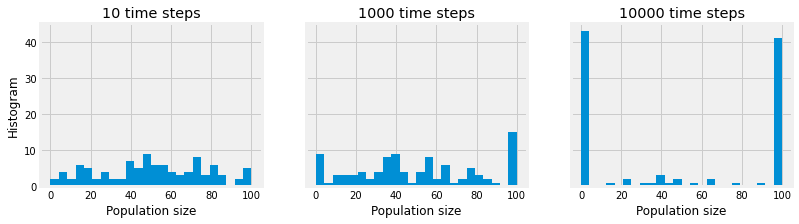

In [13]:
# Now, let's look at the histograms of the population size at different times. 
# These histograms represent the probability distribution of the Markov chain, 
# estimated with independent trials (the Monte Carlo method):        
bins = np.linspace(0, N, 25)
nsteps_list = [10, 1000, 10000]
fig, axes = plt.subplots(1, len(nsteps_list),
                         figsize=(12, 3),
                         sharey=True)
for i, nsteps in enumerate(nsteps_list):
    ax = axes[i]
    simulate(x, nsteps)
    ax.hist(x, bins=bins)
    ax.set_xlabel("Population size")
    if i == 0:
        ax.set_ylabel("Histogram")
    ax.set_title(f"{nsteps} time steps")

# Whereas, initially, the population sizes look uniformly distributed between 
# 0 and N, they appear to converge to 0 or N after a sufficiently long time. 
# This is because the states 0 and N are absorbing; once reached, the chain cannot 
# leave these states. Furthermore, these states can be reached from any other state.

In [15]:
# A state in a markov chain is called an absorbing state if once the state os entered, it is impossible to leave
#Like regular markov chains, absorbing markov chains have the property that the powers of the transition matrix approach
# a limiting matrix

#In the mathematical theory of probability, an absorbing Markov chain is a Markov chain in which every state can reach an absorbing state. 
# An absorbing state is a state that, once entered, cannot be left. Like general Markov chains, 
#...there can be continuous-time absorbing Markov chains with an infinite state space